In [9]:
import numpy as np
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd


import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [10]:
dirpath="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CARRA/CARRA_SW"
myData = os.path.join(dirpath,'snow_cryo_5-10km_2022103006.dat')

In [11]:
def get_data_fromtxt(txtFile):
    
    lat     = []
    lon     = []
    snowFrac = []
    
    f = open(txtFile, 'r')
    
    for line in f:
        
        line    = line.strip()
        columns = line.split()
        
        lat.append(float(columns[2]))
        lon.append(float(columns[3]))
        snowFrac.append(float(columns[4]))

    f.close()

    return lat, lon, snowFrac

In [12]:
lat, lon, snowFrac = get_data_fromtxt(myData)
print(len(lat))

4290


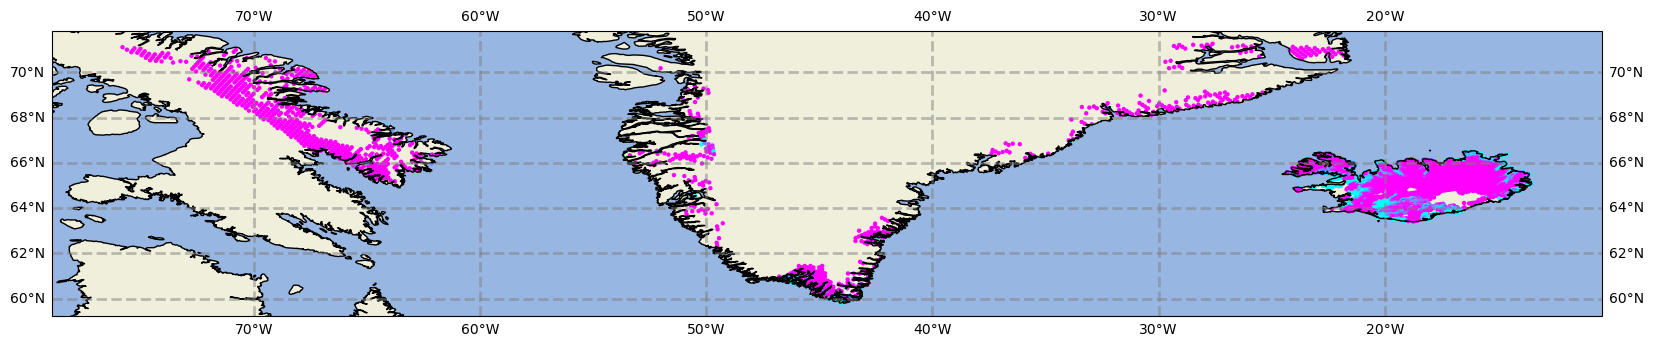

In [16]:
#mycmap = plt.cm.get_cmap('cool') #old style, deprecated

mycmap = mpl.colormaps["cool"]
lowerLeftLat  = 60
lowerLeftLon  = -120
upperRightLat = 90
upperRightLon = 0
lat_inter = 10
lon_inter = 20

#fig = plt.figure(figsize=(7.88,6.29), dpi=100)
fig = plt.figure(figsize=(20, 40),dpi=100)

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

ax.scatter(lon, lat, edgecolor="none", s=10,c=snowFrac,cmap=mycmap)#, facecolor="none")
#sc = plt.scatter(x,y, c=snowFrac, vmin=0, vmax=100, cmap=mycmap, s=10, edgecolors='none')



In [17]:
import xarray as xr

In [18]:
carra_path="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CERISE"
carra_file=os.path.join(carra_path,"snow_fraction_10_2022.grib")

In [22]:
ds = xr.open_dataset(carra_file,engine="cfgrib")


In [23]:
ds

<xarray.Dataset>
Dimensions:     (time: 248, y: 1269, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 2022-10-01 ... 2022-10-31T21:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    fscov       (time, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2023-11-23T13:38 GRIB to CDM+CF via cfgrib-0.9.1...

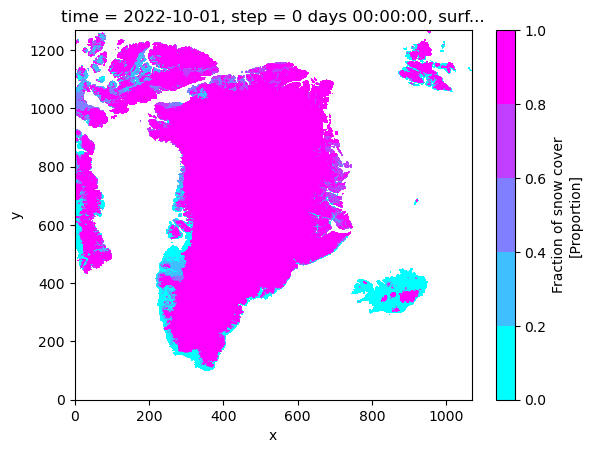

In [43]:
ds["fscov"][0].plot.contourf(cmap=mycmap)

In [ ]:
ds